**GLOBAL SALES DATA ANALYTICS**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Global_Superstore2.csv", encoding = 'unicode_escape', engine ='python')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,31
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,5
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,17
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,28
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,2014,6,19
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,2014,6,20
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,2013,12,2
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,2012,2,18


In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,31
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,5
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,17
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,28
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
df.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
Order Year          int64
Order Month         int64
Order Day           int64
dtype: object

In [ ]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,31
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,5
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,17


In [ ]:
df.tail(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.92,3,0.0,11.2308,0.01,High,2013,12,2
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,"Acco Index Tab, Economy",13.44,2,0.0,2.4000,0.00,Medium,2012,2,18
51289,6147,MX-2012-134460,22-05-2012,26-05-2012,Second Class,MC-18100,Mick Crebagga,Consumer,Tipitapa,Managua,...,"Eaton Computer Printout Paper, 8.5 x 11",61.38,3,0.0,1.8000,0.00,High,2012,5,22


In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Length: 51290, dtype: bool

In [ ]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
51288,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import matplotlib

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [ ]:
print(df["Postal Code"])

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64


In [ ]:
a=df.dropna(axis = 1)
a.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,31
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,5
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,17
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,28
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,5


In [ ]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [ ]:
print(df['Order ID'])

0         CA-2012-124891
1          IN-2013-77878
2          IN-2013-71249
3        ES-2013-1579342
4           SG-2013-4320
              ...       
51285      IN-2014-62366
51286     US-2014-102288
51287     US-2013-155768
51288     MX-2012-140767
51289     MX-2012-134460
Name: Order ID, Length: 51290, dtype: object


In [ ]:
print(df[['Ship Mode','Order Priority']])

            Ship Mode Order Priority
0            Same Day       Critical
1        Second Class       Critical
2         First Class         Medium
3         First Class         Medium
4            Same Day       Critical
...               ...            ...
51285        Same Day         Medium
51286  Standard Class         Medium
51287        Same Day           High
51288  Standard Class         Medium
51289    Second Class           High

[51290 rows x 2 columns]


In [ ]:
print(df[['Ship Mode','Product Name','Order Priority']])

            Ship Mode                                       Product Name  \
0            Same Day  Plantronics CS510 - Over-the-Head monaural Wir...   
1        Second Class          Novimex Executive Leather Armchair, Black   
2         First Class                  Nokia Smart Phone, with Caller ID   
3         First Class                     Motorola Smart Phone, Cordless   
4            Same Day                     Sharp Wireless Fax, High-Speed   
...               ...                                                ...   
51285        Same Day                      Advantus Thumb Tacks, 12 Pack   
51286  Standard Class  Hoover Replacement Belt for Commercial Guardsm...   
51287        Same Day       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes   
51288  Standard Class                            Acco Index Tab, Economy   
51289    Second Class            Eaton Computer Printout Paper, 8.5 x 11   

      Order Priority  
0           Critical  
1           Critical  
2             Medi

In [ ]:
print(df[['Order Date','Ship Date','Ship Mode']])

       Order Date   Ship Date       Ship Mode
0      31-07-2012  31-07-2012        Same Day
1      05-02-2013  07-02-2013    Second Class
2      17-10-2013  18-10-2013     First Class
3      28-01-2013  30-01-2013     First Class
4      05-11-2013  06-11-2013        Same Day
...           ...         ...             ...
51285  19-06-2014  19-06-2014        Same Day
51286  20-06-2014  24-06-2014  Standard Class
51287  02-12-2013  02-12-2013        Same Day
51288  18-02-2012  22-02-2012  Standard Class
51289  22-05-2012  26-05-2012    Second Class

[51290 rows x 3 columns]


In [ ]:
print(df[['Product Name','Sales','Quantity','Profit']])

                                            Product Name     Sales  Quantity  \
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650         7   
1              Novimex Executive Leather Armchair, Black  3709.395         9   
2                      Nokia Smart Phone, with Caller ID  5175.171         9   
3                         Motorola Smart Phone, Cordless  2892.510         5   
4                         Sharp Wireless Fax, High-Speed  2832.960         8   
...                                                  ...       ...       ...   
51285                      Advantus Thumb Tacks, 12 Pack    65.100         5   
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444         1   
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920         3   
51288                            Acco Index Tab, Economy    13.440         2   
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380         3   

         Profit  
0      762.1845  
1  

In [ ]:
print(df[['Product Name','Sales','Profit']])

                                            Product Name     Sales    Profit
0      Plantronics CS510 - Over-the-Head monaural Wir...  2309.650  762.1845
1              Novimex Executive Leather Armchair, Black  3709.395 -288.7650
2                      Nokia Smart Phone, with Caller ID  5175.171  919.9710
3                         Motorola Smart Phone, Cordless  2892.510  -96.5400
4                         Sharp Wireless Fax, High-Speed  2832.960  311.5200
...                                                  ...       ...       ...
51285                      Advantus Thumb Tacks, 12 Pack    65.100    4.5000
51286  Hoover Replacement Belt for Commercial Guardsm...     0.444   -1.1100
51287       #10- 4 1/8" x 9 1/2" Security-Tint Envelopes    22.920   11.2308
51288                            Acco Index Tab, Economy    13.440    2.4000
51289            Eaton Computer Printout Paper, 8.5 x 11    61.380    1.8000

[51290 rows x 3 columns]


In [ ]:
print(df[['Country','Sales','Profit']])

             Country     Sales    Profit
0      United States  2309.650  762.1845
1          Australia  3709.395 -288.7650
2          Australia  5175.171  919.9710
3            Germany  2892.510  -96.5400
4            Senegal  2832.960  311.5200
...              ...       ...       ...
51285          Japan    65.100    4.5000
51286  United States     0.444   -1.1100
51287  United States    22.920   11.2308
51288         Brazil    13.440    2.4000
51289      Nicaragua    61.380    1.8000

[51290 rows x 3 columns]


In [ ]:
print(df[['Category','Discount']])

              Category  Discount
0           Technology       0.0
1            Furniture       0.1
2           Technology       0.1
3           Technology       0.1
4           Technology       0.0
...                ...       ...
51285  Office Supplies       0.0
51286  Office Supplies       0.8
51287  Office Supplies       0.0
51288  Office Supplies       0.0
51289  Office Supplies       0.0

[51290 rows x 2 columns]


In [ ]:
print(df[df['Category']=='Furniture'])

       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
1       26341   IN-2013-77878  05-02-2013  07-02-2013    Second Class   
6       30570   IN-2011-81826  07-11-2011  09-11-2011     First Class   
7       31192   IN-2012-86369  14-04-2012  18-04-2012  Standard Class   
9       40936  CA-2012-116638  28-01-2012  31-01-2012    Second Class   
11      28879   ID-2012-28402  19-04-2012  22-04-2012     First Class   
...       ...             ...         ...         ...             ...   
51232    3569  US-2013-148705  16-12-2013  18-12-2013    Second Class   
51239   34383  CA-2014-118773  10-02-2014  15-02-2014  Standard Class   
51242   36409  CA-2012-153073  13-11-2012  13-11-2012        Same Day   
51246   44081    TU-2013-7830  14-06-2013  18-06-2013  Standard Class   
51254   31608  CA-2013-142902  13-09-2013  15-09-2013    Second Class   

      Customer ID     Customer Name    Segment        City            State  \
1        JR-16210     Justin Ritter  Corpora

In [ ]:
print(df[df['Order Date']=='31-07-2012'])

       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0       32298  CA-2012-124891  31-07-2012  31-07-2012        Same Day   
331     32299  CA-2012-124891  31-07-2012  31-07-2012        Same Day   
10167    7617  US-2012-149328  31-07-2012  04-08-2012  Standard Class   
11701    4557  MX-2012-159380  31-07-2012  02-08-2012     First Class   
11890     166  MX-2012-107146  31-07-2012  05-08-2012    Second Class   
13280    7618  US-2012-149328  31-07-2012  04-08-2012  Standard Class   
14304   10160  US-2012-105753  31-07-2012  05-08-2012    Second Class   
16191     167  MX-2012-107146  31-07-2012  05-08-2012    Second Class   
16198   29905   ID-2012-79999  31-07-2012  05-08-2012  Standard Class   
17640   35877  CA-2012-164427  31-07-2012  06-08-2012  Standard Class   
17840   51263    AG-2012-1940  31-07-2012  04-08-2012  Standard Class   
19436    7366  US-2012-145849  31-07-2012  07-08-2012  Standard Class   
20743    8809  US-2012-121097  31-07-2012  05-08-20

**Perform Visualizations**

Univariate Analysis

Bi-variate Analysis

Multi-variate Analysis

**Univariate Analysis**

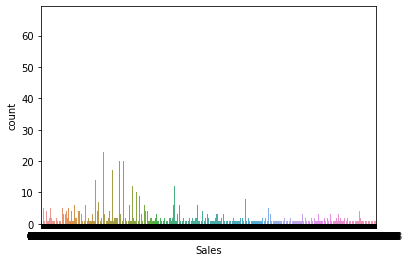

In [ ]:
#Countplot
sns.countplot(data=df,x="Sales")

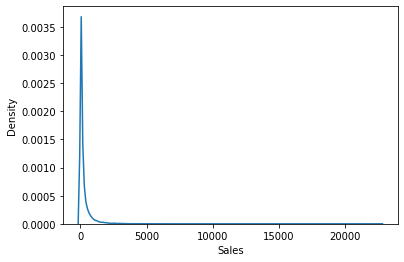

In [ ]:
#kdeplot
sns.kdeplot(df['Sales'])

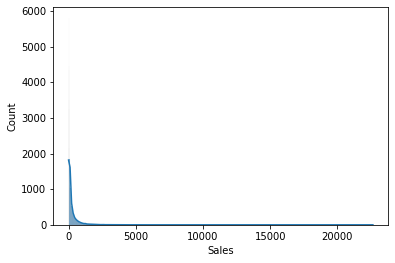

In [ ]:
#histplot
sns.histplot(df.Sales,kde=True)

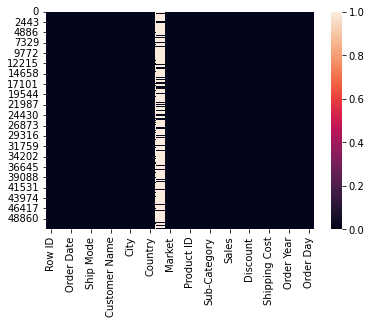

In [ ]:
#heatmap
sns.heatmap(df.isnull())

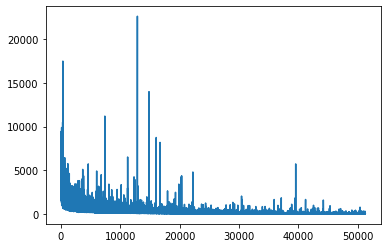

In [ ]:
#lineplot
plt.plot(df['Sales'])

([<matplotlib.patches.Wedge at 0x7fbe1a76c710>,
 [Text(1.0003897707269493, 0.4574060631702232, ''),
  Text(0.026783616897128142, 1.0996738779592377, ''),
  Text(-1.0983661639814886, -0.059931375927724045, ''),
  Text(-0.020134751439332167, -1.099815708100442, ''),
  Text(0.9512963094673265, -0.5523000376551179, '')],
 [Text(0.545667147669245, 0.24949421627466717, '13.7'),
  Text(0.014609245580251713, 0.5998221152504931, '21.9'),
  Text(-0.5991088167171755, -0.032689841415122205, '30.6'),
  Text(-0.010982591694181181, -0.5998994771456956, '17.1'),
  Text(0.5188888960730871, -0.30125456599370065, '16.7')])

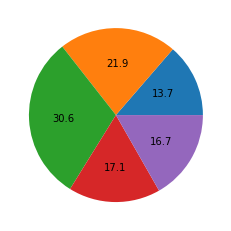

In [ ]:
#piechart
plt.pie(df['Sales'].head(),autopct='%.1f')

**Bi-variate Analysis**

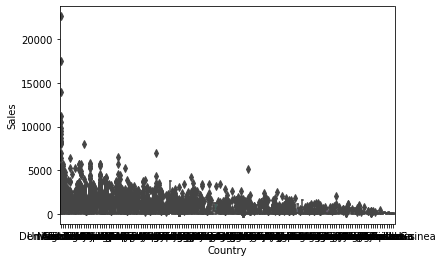

In [ ]:
#boxplot
sns.boxplot(x='Country',y='Sales',data=df)

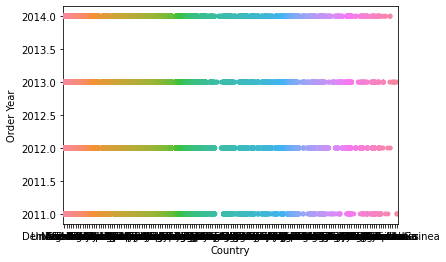

In [ ]:
#stripplot
sns.stripplot(x="Country", y="Order Year", data=df)

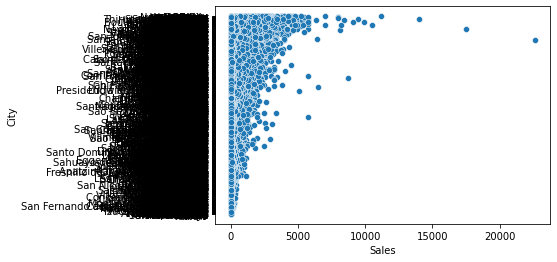

In [ ]:
#scatterplot
sns.scatterplot(x= df["Sales"],y = df["City"])

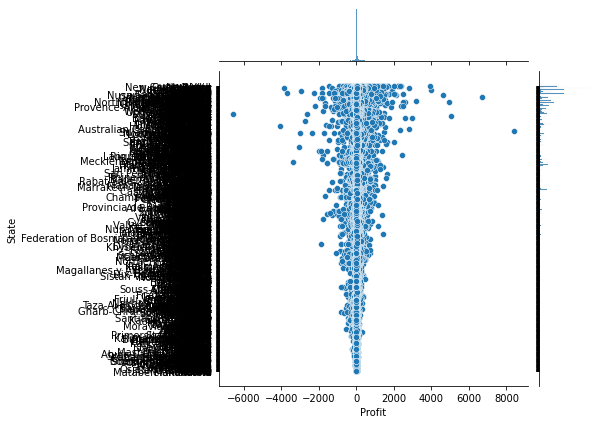

In [ ]:
#jointplot
sns.jointplot(x="Profit",y="State",data=df)

**Multi-variate Analysis**

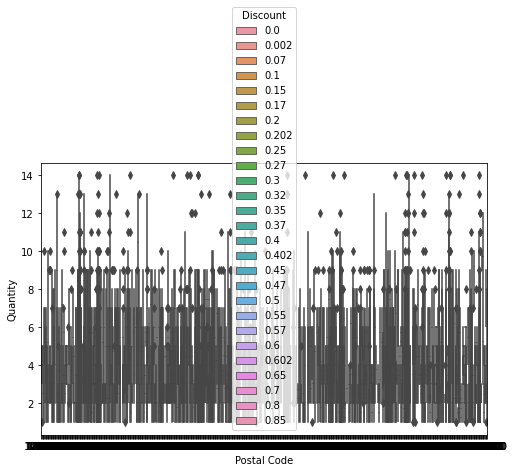

In [ ]:
#boxplot
fig, ax1 = plt.subplots(figsize=(8,5))
testplot = sns.boxplot(ax=ax1, x='Postal Code', y='Quantity', hue='Discount', data=df)

In [ ]:
numerical_features = df.select_dtypes(include = [np.number]).columns
categorial_features = df.select_dtypes(include = [object]).columns

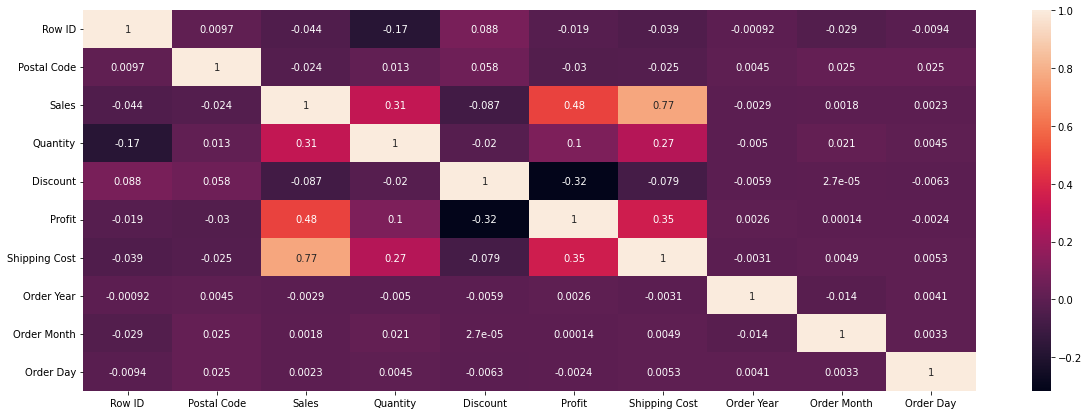

In [ ]:
plt.figure(figsize =(20,7))
sns.heatmap(df[numerical_features].corr(),annot = True)

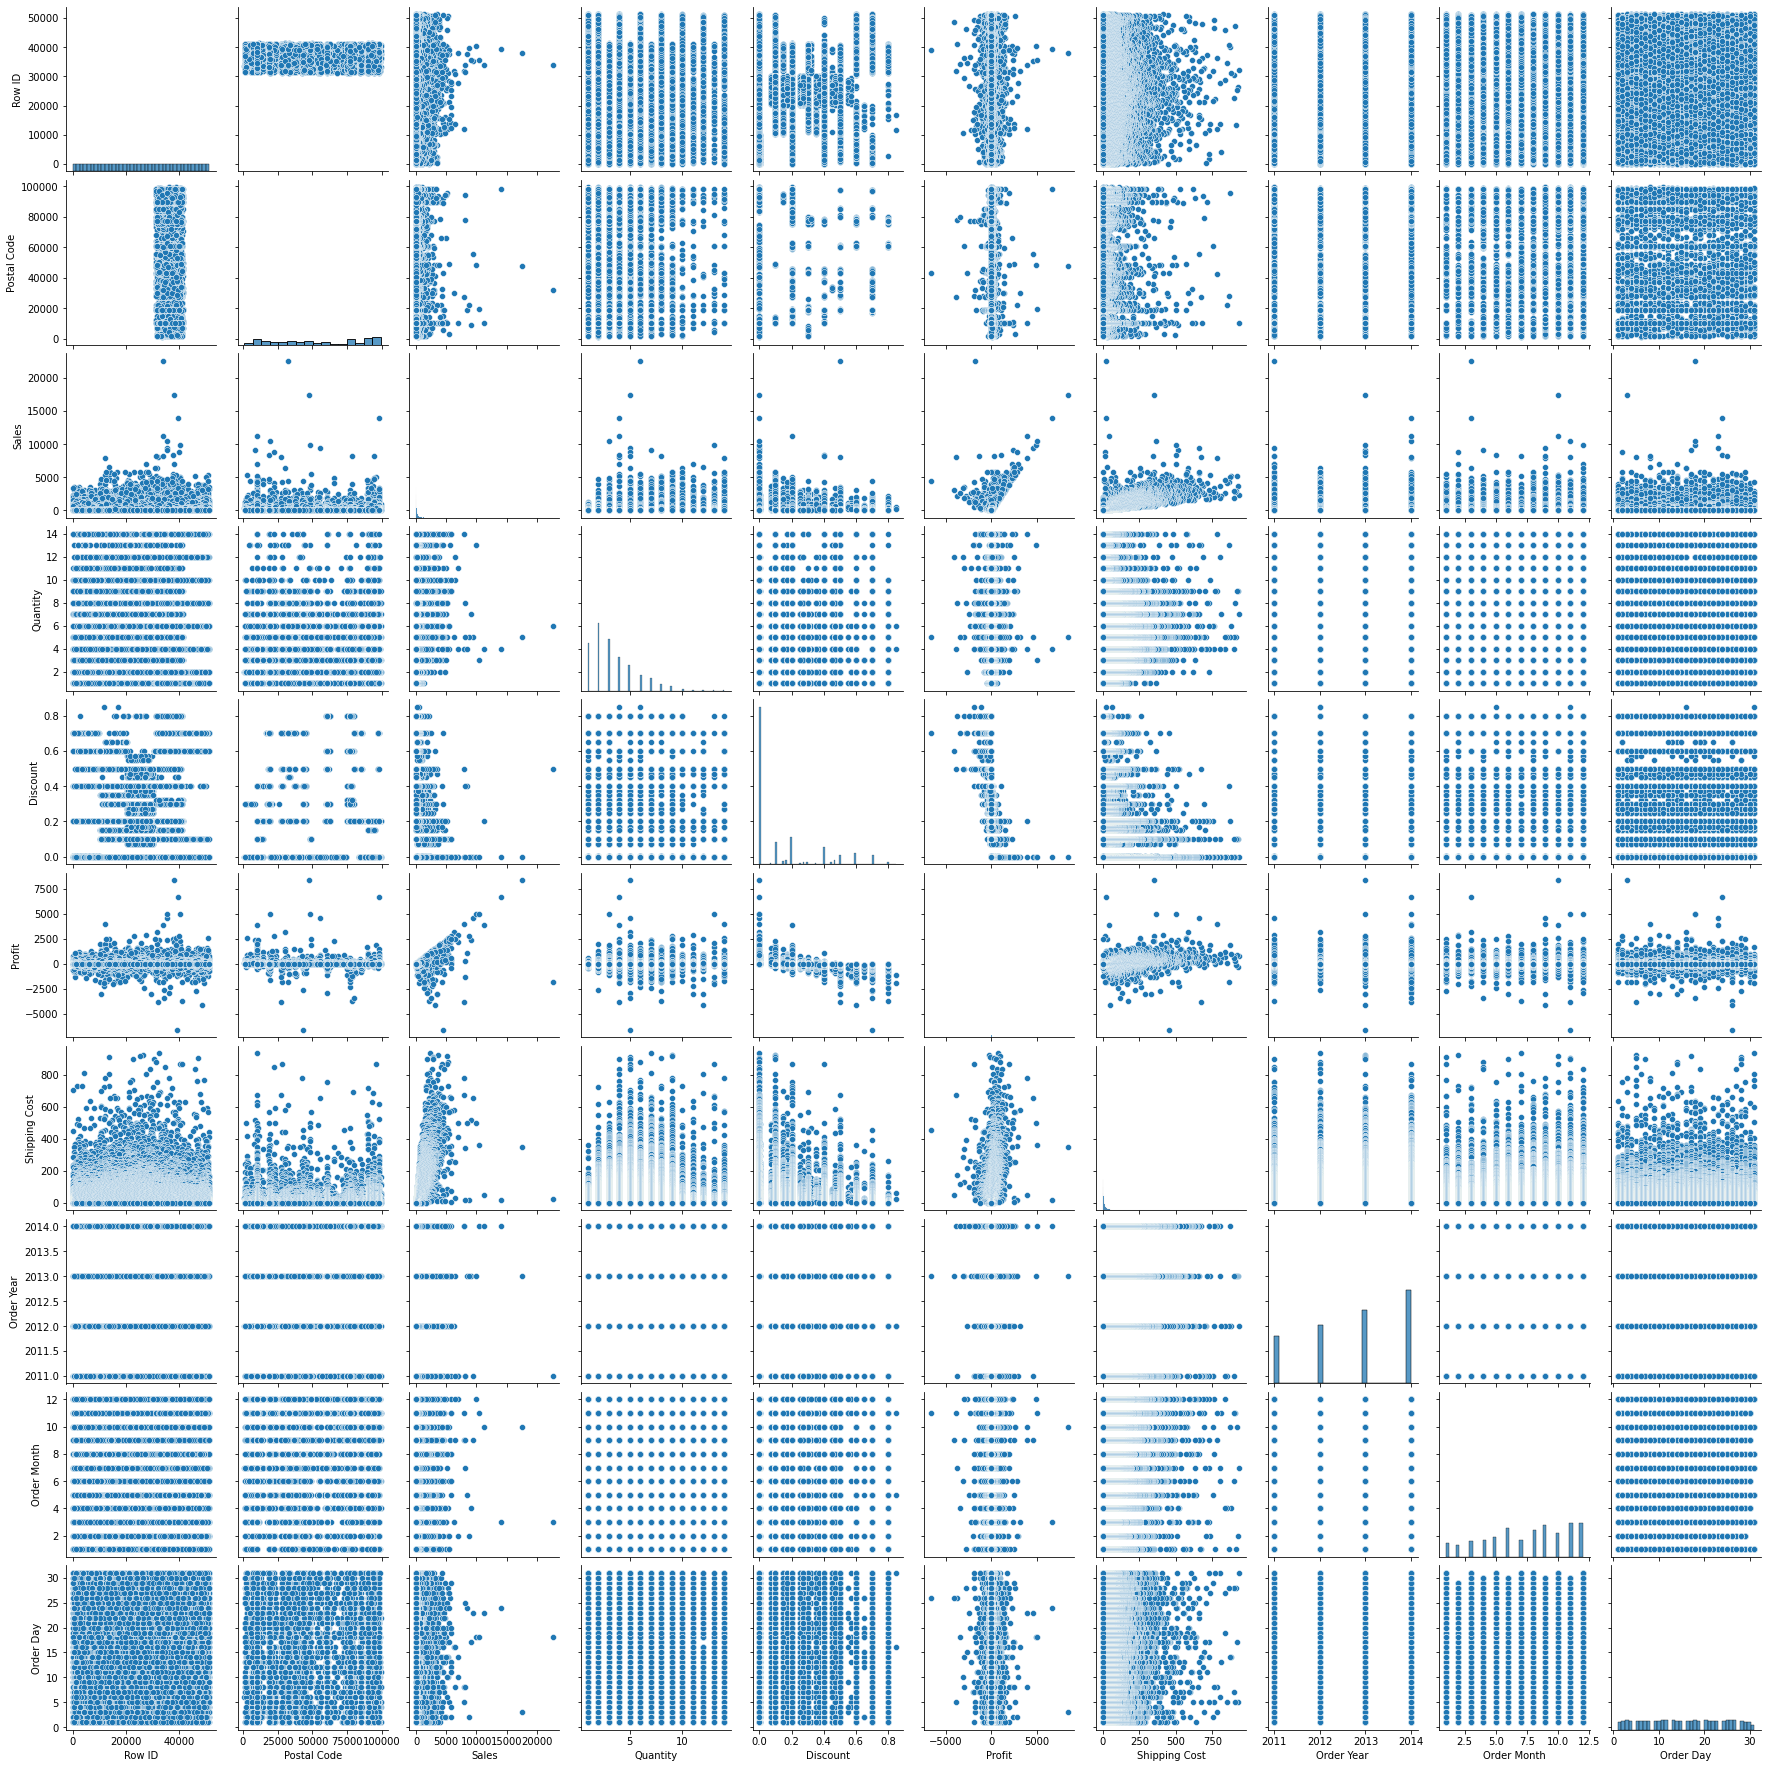

In [ ]:
sns.pairplot(df)

**Perform descriptive statistics on the dataset**

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Order Year,Order Month,Order Day
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,2012,7,31
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2013,2,5
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,2013,10,17
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,2013,1,28
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,2013,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,19-06-2014,19-06-2014,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.01,Medium,2014,6,19
51286,35398,US-2014-102288,20-06-2014,24-06-2014,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.01,Medium,2014,6,20
51287,40470,US-2013-155768,02-12-2013,02-12-2013,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.01,High,2013,12,2
51288,9596,MX-2012-140767,18-02-2012,22-02-2012,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.00,Medium,2012,2,18


In [ ]:
df.describe

<bound method NDFrame.describe of        Row ID         Order ID  Order Date   Ship Date       Ship Mode  \
0       32298   CA-2012-124891  31-07-2012  31-07-2012        Same Day   
1       26341    IN-2013-77878  05-02-2013  07-02-2013    Second Class   
2       25330    IN-2013-71249  17-10-2013  18-10-2013     First Class   
3       13524  ES-2013-1579342  28-01-2013  30-01-2013     First Class   
4       47221     SG-2013-4320  05-11-2013  06-11-2013        Same Day   
...       ...              ...         ...         ...             ...   
51285   29002    IN-2014-62366  19-06-2014  19-06-2014        Same Day   
51286   35398   US-2014-102288  20-06-2014  24-06-2014  Standard Class   
51287   40470   US-2013-155768  02-12-2013  02-12-2013        Same Day   
51288    9596   MX-2012-140767  18-02-2012  22-02-2012  Standard Class   
51289    6147   MX-2012-134460  22-05-2012  26-05-2012    Second Class   

      Customer ID     Customer Name      Segment           City  \
0        R

In [ ]:
df[numerical_features].mean()

Row ID           25645.500000
Postal Code      55190.379428
Sales              246.490581
Quantity             3.476545
Discount             0.142908
Profit              28.610982
Shipping Cost       26.375915
Order Year        2012.777208
Order Month          7.522636
Order Day           15.782960
dtype: float64

In [ ]:
df[numerical_features].median

<bound method NDFrame._add_numeric_operations.<locals>.median of        Row ID  Postal Code     Sales  Quantity  Discount    Profit  \
0       32298      10024.0  2309.650         7       0.0  762.1845   
1       26341          NaN  3709.395         9       0.1 -288.7650   
2       25330          NaN  5175.171         9       0.1  919.9710   
3       13524          NaN  2892.510         5       0.1  -96.5400   
4       47221          NaN  2832.960         8       0.0  311.5200   
...       ...          ...       ...       ...       ...       ...   
51285   29002          NaN    65.100         5       0.0    4.5000   
51286   35398      77095.0     0.444         1       0.8   -1.1100   
51287   40470      93030.0    22.920         3       0.0   11.2308   
51288    9596          NaN    13.440         2       0.0    2.4000   
51289    6147          NaN    61.380         3       0.0    1.8000   

       Shipping Cost  Order Year  Order Month  Order Day  
0             933.57        2012   

In [ ]:
df[numerical_features].value_counts()

Row ID  Postal Code  Sales    Quantity  Discount  Profit     Shipping Cost  Order Year  Order Month  Order Day
31297   42420.0      261.960  2         0.0        41.9136   54.10          2013        11           9            1
37962   75061.0      219.840  5         0.2        79.6920   35.96          2013        7            15           1
37955   85234.0      68.704   2         0.2        16.3172   7.59           2014        2            21           1
37956   85234.0      386.910  9         0.5       -185.7168  44.06          2014        2            21           1
37957   1841.0       39.660   2         0.0        11.8980   8.62           2012        8            8            1
                                                                                                                 ..
34629   60653.0      52.680   3         0.2        19.7550   1.36           2014        12           15           1
34630   60653.0      2.032    1         0.6       -1.3208    0.10           2

In [ ]:
df[numerical_features].mode()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Order Year,Order Month,Order Day
0,1,10035.0,12.96,2.0,0.0,0.0,0.86,2014.0,11.0,18.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
51285,51286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51286,51287,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51287,51288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51288,51289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[numerical_features].std()

Row ID           14806.291990
Postal Code      32063.693350
Sales              487.565361
Quantity             2.278766
Discount             0.212280
Profit             174.340972
Shipping Cost       57.296804
Order Year           1.098931
Order Month          3.300056
Order Day            8.742164
dtype: float64

In [ ]:
df[numerical_features].skew()

Row ID          -6.006947e-18
Postal Code     -1.285255e-01
Sales            8.138080e+00
Quantity         1.360368e+00
Discount         1.387775e+00
Profit           4.157189e+00
Shipping Cost    5.863226e+00
Order Year      -3.445153e-01
Order Month     -3.579712e-01
Order Day       -1.486652e-03
dtype: float64

In [ ]:
df[numerical_features].kurt()

Row ID            -1.200000
Postal Code       -1.493020
Sales            176.731200
Quantity           2.275889
Discount           0.716682
Profit           291.411090
Shipping Cost     50.020158
Order Year        -1.222033
Order Month       -0.977879
Order Day         -1.189482
dtype: float64

**Check for Missing values and deal with them**

In [ ]:
df.shape

(51290, 27)

In [ ]:
df.isnull().any()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
Order Year        False
Order Month       False
Order Day         False
dtype: bool

In [ ]:
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
Order Year            0
Order Month           0
Order Day             0
dtype: int64

**Find the outliers and replace them outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


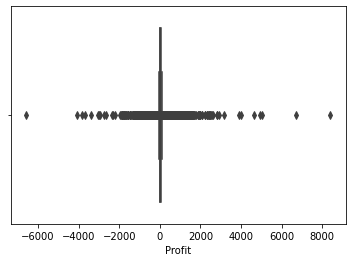

In [ ]:
#profit
sns.boxplot(df['Profit'])

In [ ]:
q1 = df['Profit'].quantile(0.25)
q2 = df['Profit'].quantile(0.75)
iqr = q2-q1
q1, q2, iqr

(0.0, 36.81, 36.81)

In [ ]:
upper_limit = q2 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit,upper_limit

(-55.215, 92.025)

In [ ]:
new_df = df.loc[(df['Profit']<= upper_limit) & (df['Profit'] >= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:',len(new_df))
print('outliers', len(df)-len(new_df))

before removing outliers: 51290
after removing outliers: 41535
outliers 9755


In [ ]:
new_df = df.copy()
new_df.loc[(new_df['Profit']>upper_limit), 'Profit'] = upper_limit
new_df.loc[(new_df['Profit']<lower_limit), 'Profit'] = lower_limit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


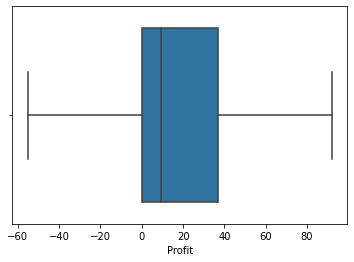

In [ ]:
sns.boxplot(new_df['Profit'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


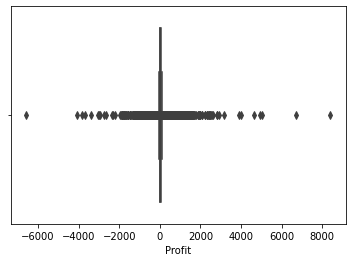

In [ ]:
sns.boxplot(df['Profit'])

In [ ]:
#sales
q1 = df['Sales'].quantile(0.25)
q2 = df['Sales'].quantile(0.75)
iqr = q2-q1
q1, q2, iqr

(30.758625000000002, 251.0532, 220.294575)

In [ ]:
upper_limit = q2 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit,upper_limit

(-299.6832375, 581.4950625)

In [ ]:
new_df = df.loc[(df['Sales'] <= upper_limit) & (df['Sales'] >= lower_limit)]
print('before removing outiers:', len(df))
print('after removing outliers"', len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outiers: 51290
after removing outliers" 45635
outliers: 5655


In [ ]:
new_df = df.copy()
new_df.loc[(new_df['Sales']>upper_limit), 'Sales'] = upper_limit
new_df.loc[(new_df['Sales']<lower_limit), 'Sales'] = lower_limit

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


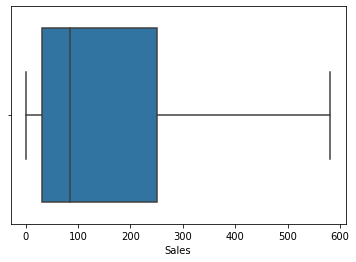

In [ ]:
sns.boxplot(new_df['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


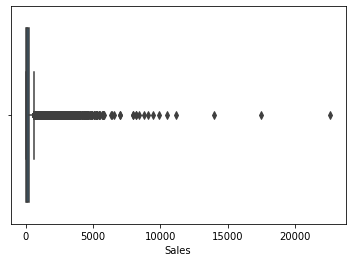

In [ ]:
sns.boxplot(df['Sales'])

In [ ]:
#Discount
q1 = df['Discount'].quantile(0.25)
q2= df['Discount'].quantile(0.75)
iqr = q2-q1
q1, q2, iqr


(0.0, 0.2, 0.2)

In [ ]:
upper_limit = q2 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)
lower_limit,upper_limit

(-0.30000000000000004, 0.5)

In [ ]:
new_df = df.loc[(df['Discount']<= upper_limit) & (df['Discount']>= lower_limit)]
print('before removing outliers:', len(df))
print('after removing outliers:', len(new_df))
print('outliers:', len(df)-len(new_df))

before removing outliers: 51290
after removing outliers: 47118
outliers: 4172


In [ ]:
new_df = df.copy()
new_df.loc[(new_df['Discount']>upper_limit), 'Discount'] = upper_limit
new_df.loc[(new_df['Discount']<lower_limit),'Discount'] = lower_limit


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


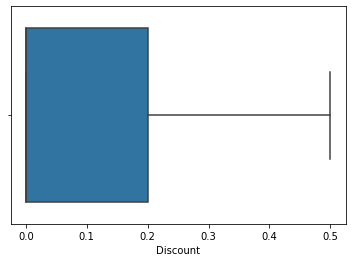

In [ ]:
sns.boxplot(new_df['Discount'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


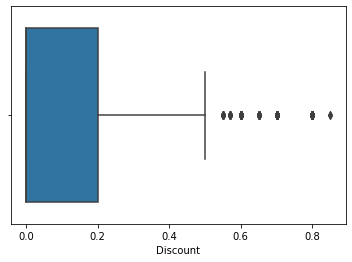

In [ ]:
sns.boxplot(df['Discount'])